<a href="https://colab.research.google.com/github/ImAli0/ImAli/blob/main/AI__course__week6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 866 bytes/s 
     |████████████████████████████████| 2.9 MB 40.3 MB/s 
     |████████████████████████████████| 3.8 MB 44.6 MB/s 
     |████████████████████████████████| 50 kB 3.9 MB/s 
     |████████████████████████████████| 20.1 MB 82.0 MB/s 
     |████████████████████████████████| 503 kB 61.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=5f7be6a038f6a05ec84e5dcd8aa8e8659158a7fd134c6e2c3428b5b9146b2b4f
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully un

In [ ]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
learning_parameter = 0.01
epochs = 300


In [ ]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

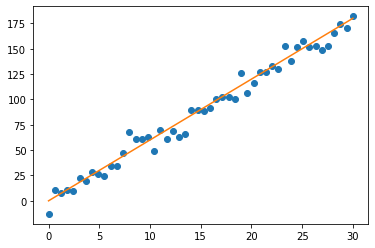

In [ ]:
# Noisy dataset
plt.plot(x_train, y_train, 'o')
# Noise free dataset 
plt.plot(x_train, 6*x_train)
plt.show()

In [ ]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')


In [ ]:
#Create the model for regression
prediction = W*X + B

# Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epochs 0.000000 Cost 1.189333 Weight 5.720351 Bias -0.509540
Epochs 40.000000 Cost 0.237918 Weight 5.921001 Bias -0.501086
Epochs 80.000000 Cost 0.237850 Weight 5.921173 Bias -0.505530
Epochs 120.000000 Cost 0.237789 Weight 5.921328 Bias -0.509554
Epochs 160.000000 Cost 0.237735 Weight 5.921468 Bias -0.513199
Epochs 200.000000 Cost 0.237685 Weight 5.921595 Bias -0.516498
Epochs 240.000000 Cost 0.237640 Weight 5.921710 Bias -0.519485
Epochs 280.000000 Cost 0.237601 Weight 5.921813 Bias -0.522191


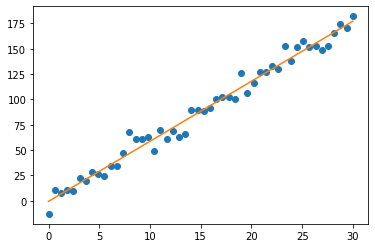

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [ ]:
# Create the model for regression
with tf.name_scope("Model") as scope:
  prediction = W*X + B

# Add summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)

# Cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Record the scalar summary of the cost function
cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [ ]:
#Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

#Merge all the summaries into a single operator
merged_summary = tf.summary.merge_all()

Epochs 0.000000 Cost 1.189333 Weight 5.720351 Bias -0.509540
Epochs 40.000000 Cost 0.237918 Weight 5.921001 Bias -0.501086
Epochs 80.000000 Cost 0.237850 Weight 5.921173 Bias -0.505530
Epochs 120.000000 Cost 0.237789 Weight 5.921328 Bias -0.509554
Epochs 160.000000 Cost 0.237735 Weight 5.921468 Bias -0.513199
Epochs 200.000000 Cost 0.237685 Weight 5.921595 Bias -0.516498
Epochs 240.000000 Cost 0.237640 Weight 5.921710 Bias -0.519485
Epochs 280.000000 Cost 0.237601 Weight 5.921813 Bias -0.522191


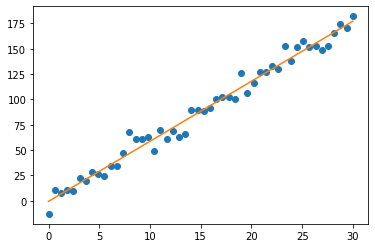

In [ ]:
# Define the tensorflow session
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict = {X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()


In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.1 kB/s 
     |████████████████████████████████| 503 kB 45.5 MB/s 
     |████████████████████████████████| 3.8 MB 28.3 MB/s 
     |████████████████████████████████| 2.9 MB 33.1 MB/s 
     |████████████████████████████████| 20.1 MB 12.2 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=bd1b24cfa678bd310dc65f390fdaec66aee7b01f0be26000b4c168ff52de9253
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully unins

In [ ]:
 !wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-freebsd-amd64.tgz


--2022-07-31 08:06:10--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-darwin-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7642723 (7.3M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-darwin-amd64.zip’

ngrok-v3-stable-dar 100%[===================>]   7.29M  39.6MB/s    in 0.2s    

2022-07-31 08:06:10 (39.6 MB/s) - ‘ngrok-v3-stable-darwin-amd64.zip’ saved [7642723/7642723]



In [ ]:
!unzip ngrok-v3-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://b8a5-35-237-204-197.ngrok.io


In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110.5 MB 1.2 MB/s 
     |████████████████████████████████| 20.1 MB 812 kB/s 
     |████████████████████████████████| 2.9 MB 42.2 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 3.8 MB 45.1 MB/s 
     |████████████████████████████████| 503 kB 67.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=9b5cbdbdeaf9de929c06b5c15f3eeb4c21714262e0e084779fb25932c0937a5b
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninst

In [ ]:
# Import the dependencies
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [ ]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")

MNIST Datasize: Training samples: {0}, Testing samples: {1}


In [ ]:
# Network parameters of Neural Network
n_input = 784     # Input image of size 28 x 28
n_hidden_1 = 512  # First hidden layer
n_hidden_2 = 256  # Second hidden layer
n_hidden_3 = 128  # Third hidden layer
n_output = 10     # Output layer having (0-9) digits

In [ ]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

In [ ]:
# Building tensorflow graph

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])


In [ ]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout":tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
}

nn_bias = { "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
            "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
            "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
            "B4": tf.Variable(tf.truncated_normal([n_output])),  
           }

In [ ]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]),nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# Define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

#Define prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

# Define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

# Initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [ ]:
# Executing the computational graph

with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0} , Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))

  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")
      

Iterations : 0 , Train_loss = 46.654441833496094, Train_Accuracy 0.1328125, Val_loss 46.654441833496094, Val_accuracy 0.1328125
Iterations : 100 , Train_loss = 7.197895526885986, Train_Accuracy 0.3671875, Val_loss 7.197895526885986, Val_accuracy 0.3671875
Iterations : 200 , Train_loss = 5.135555267333984, Train_Accuracy 0.5546875, Val_loss 5.135555267333984, Val_accuracy 0.5546875
Iterations : 300 , Train_loss = 4.6370086669921875, Train_Accuracy 0.6640625, Val_loss 4.6370086669921875, Val_accuracy 0.6640625
Iterations : 400 , Train_loss = 3.0770339965820312, Train_Accuracy 0.7265625, Val_loss 3.0770339965820312, Val_accuracy 0.7265625
Iterations : 500 , Train_loss = 2.6560683250427246, Train_Accuracy 0.765625, Val_loss 2.6560683250427246, Val_accuracy 0.765625
Iterations : 600 , Train_loss = 3.2203214168548584, Train_Accuracy 0.71875, Val_loss 3.2203214168548584, Val_accuracy 0.71875
Iterations : 700 , Train_loss = 2.0610880851745605, Train_Accuracy 0.796875, Val_loss 2.06108808517456

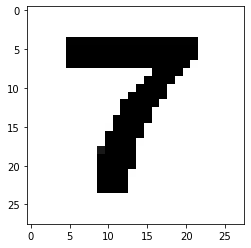

Prediction for test image is [0]


In [ ]:

img = cv2.imread("7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))